Data Wrangling II

Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.


In [191]:
import pandas as pd
data = {
    "s_id" : [10,1,None,4,7,1,3,None,6,5,2,8,None,10,3,4,5,6,7,],
    "s_name":["abc","efg","hyj","klm","nop","iod","dfg","abc","dgf","hyj","gsb","nop","iod","dfg","abc","efg","hyj","klm","nop",],
    "grade":["A","A","F","A+","B+","F","P","A","B","F","A+","B+","F","P","A","B","F","A+","B+",],
    "attendance":[31,40,32,30,None,34,39,100,35,30,41,None,35,34,30,31,32,None,36],
}
df = pd.DataFrame(data)
print(df)

    s_id s_name grade  attendance
0   10.0    abc     A        31.0
1    1.0    efg     A        40.0
2    NaN    hyj     F        32.0
3    4.0    klm    A+        30.0
4    7.0    nop    B+         NaN
5    1.0    iod     F        34.0
6    3.0    dfg     P        39.0
7    NaN    abc     A       100.0
8    6.0    dgf     B        35.0
9    5.0    hyj     F        30.0
10   2.0    gsb    A+        41.0
11   8.0    nop    B+         NaN
12   NaN    iod     F        35.0
13  10.0    dfg     P        34.0
14   3.0    abc     A        30.0
15   4.0    efg     B        31.0
16   5.0    hyj     F        32.0
17   6.0    klm    A+         NaN
18   7.0    nop    B+        36.0


In [192]:
df.shape

(19, 4)

In [193]:
df.describe()

,s_id,attendance
count,16.000000,16.000000
mean,5.125000,38.125000
std,2.825479,16.879475
min,1.000000,30.000000
25%,3.000000,31.000000
50%,5.000000,34.000000
75%,7.000000,36.750000
max,10.000000,100.000000


In [194]:
#1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
#inconsistencies, use any of the suitable techniques to deal with them.

df.isnull().sum()

s_id          3
s_name        0
grade         0
attendance    3
dtype: int64

In [195]:
df['s_id'].fillna(0, inplace=True)
df['attendance'].ffill(inplace=True)

C:\Users\dhans\AppData\Local\Temp\ipykernel_19552\306091519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['s_id'].fillna(0, inplace=True)
C:\Users\dhans\AppData\Local\Temp\ipykernel_19552\306091519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [196]:
df.isnull().sum()

s_id          0
s_name        0
grade         0
attendance    0
dtype: int64

Skewness of 'attendance' before transformation: 3.9446908403405865


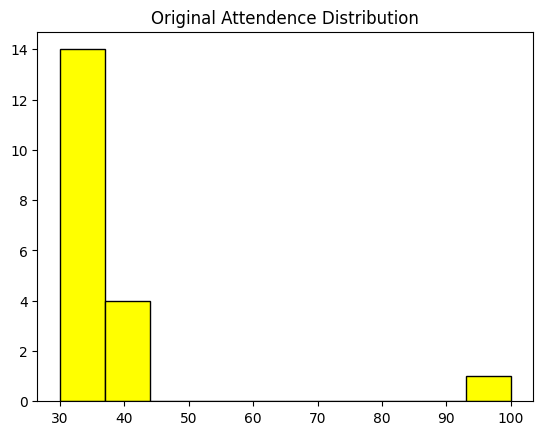

Skewness of 'attendance' after transformation: 3.3048639851261035


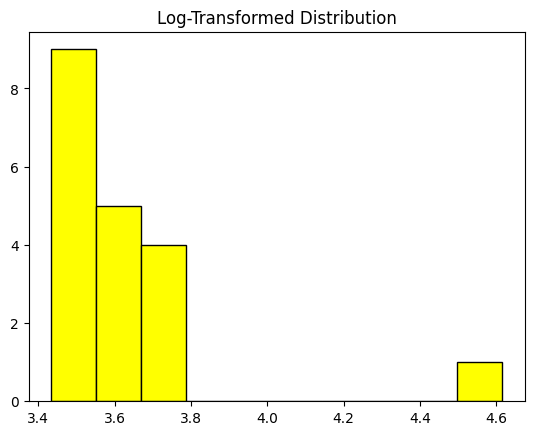

In [197]:
# 3. Apply data transformations on at least one of the variables. The purpose of this
# transformation should be one of the following reasons: to change the scale for better
# understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
# the skewness and convert the distribution into a normal distribution.

print(f"Skewness of 'attendance' before transformation: {df['attendance'].skew()}")
import matplotlib.pyplot as plt
plt.hist(df['attendance'],color="yellow",edgecolor="black")
plt.title("Original Attendence Distribution")
plt.show()
import numpy as np
df['attendance_transformed'] = np.log1p(df['attendance'])
print(f"Skewness of 'attendance' after transformation: {df['attendance_transformed'].skew()}")
plt.hist(df['attendance_transformed'],color="yellow",edgecolor="black")
plt.title("Log-Transformed Distribution")
plt.show()

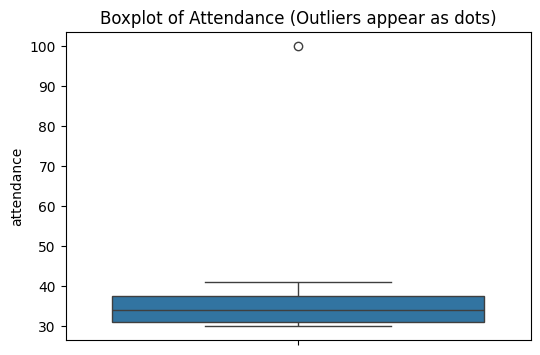

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['attendance'])
plt.title("Boxplot of Attendance (Outliers appear as dots)")
plt.show()


In [199]:
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
# to deal with them
mean_att = df['attendance'].mean()
std_att = df['attendance'].std()

df['z_score'] = (df['attendance'] - mean_att)/std_att

# Step 3: Set threshold and detect outliers (e.g., Z-score > 3 or < -3)
df['is_outlier'] = df['z_score'].abs() > 1
# df['is_outlier']
# Step 4: Filter out outliers if needed
df_cleaned = df[~df['is_outlier']].copy()
df_cleaned



,s_id,s_name,grade,attendance,attendance_transformed,z_score,is_outlier
0,10.0,abc,A,31.0,3.465736,-0.418437,False
1,1.0,efg,A,40.0,3.713572,0.158601,False
2,0.0,hyj,F,32.0,3.496508,-0.354322,False
3,4.0,klm,A+,30.0,3.433987,-0.482552,False
4,7.0,nop,B+,30.0,3.433987,-0.482552,False
5,1.0,iod,F,34.0,3.555348,-0.226091,False
6,3.0,dfg,P,39.0,3.688879,0.094486,False
8,6.0,dgf,B,35.0,3.583519,-0.161976,False
9,5.0,hyj,F,30.0,3.433987,-0.482552,False
10,2.0,gsb,A+,41.0,3.737670,0.222716,False
